In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1776,2020-09-27,United Kingdom,428001.0,429277.0,41997.0,41971.0,-1276.0,26.0
1777,2020-09-27,Germany,284550.0,284140.0,9469.0,9457.0,410.0,12.0
1778,2020-09-27,Iran,442730.0,443086.0,25422.0,25394.0,-356.0,28.0
1779,2020-09-27,Turkey,312773.0,312966.0,7918.0,7929.0,-193.0,-11.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  11088.55530600786
RMSE =  40141.35280490508


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  316.28691746209995
RMSE =  791.18759873704


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  81348.04166666667
RMSE =  126919.01585884356
-- World performances for deaths --
MAE =  1885.9285714285713
RMSE =  2284.5712945758555


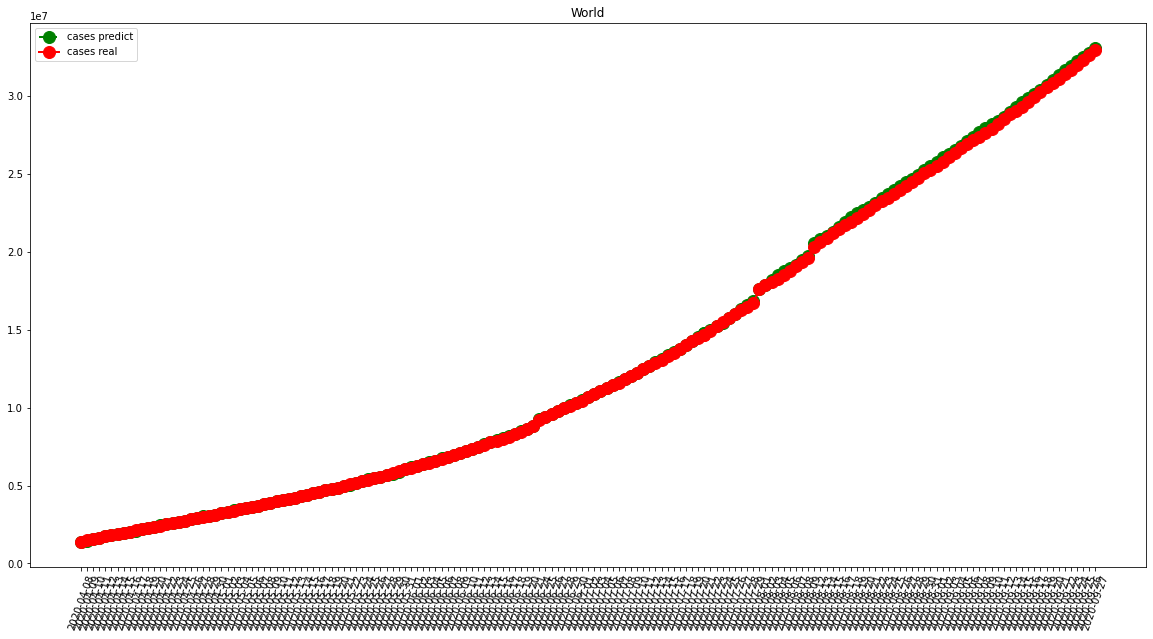

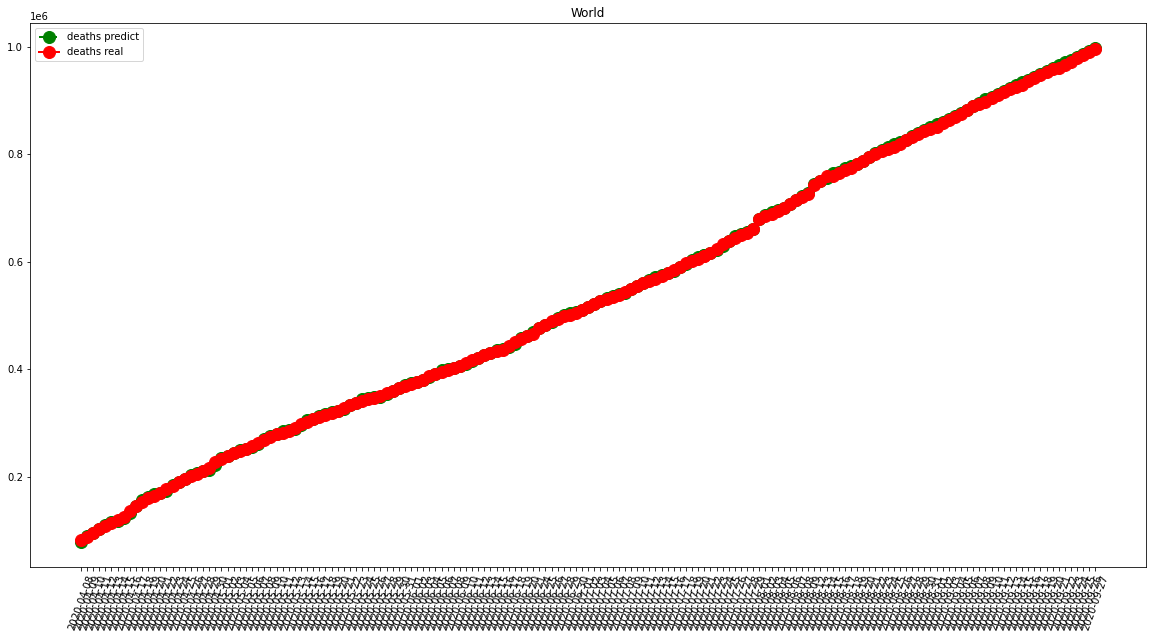

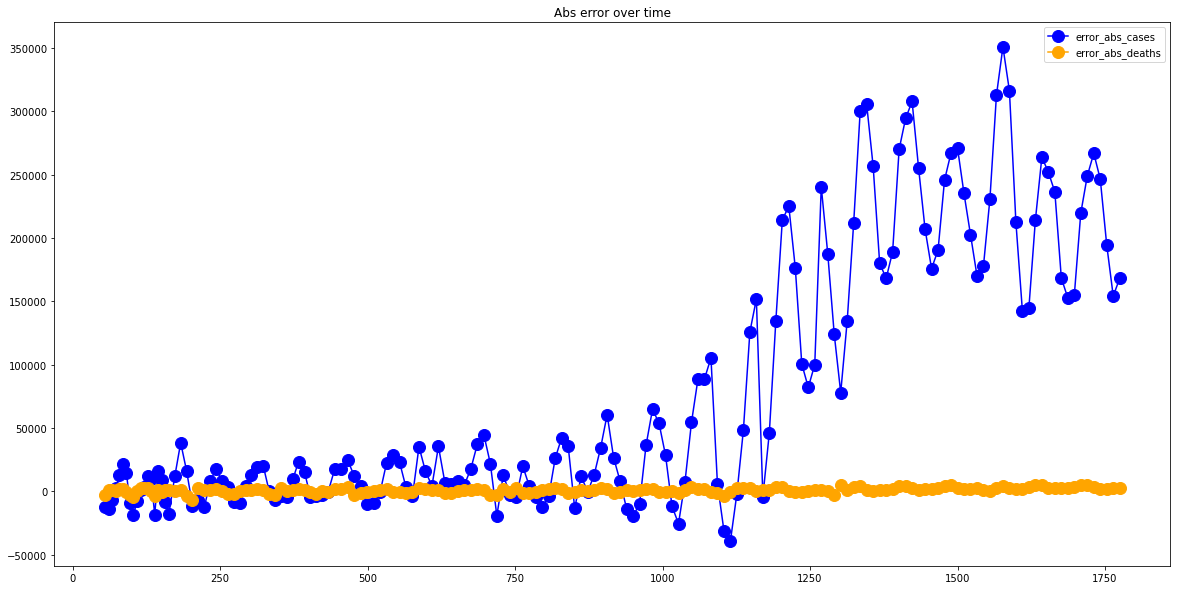

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1270.1741573033707
RMSE =  1958.1188017005081
-- France performances for deaths --
MAE =  109.45505617977528
RMSE =  252.00732332858098


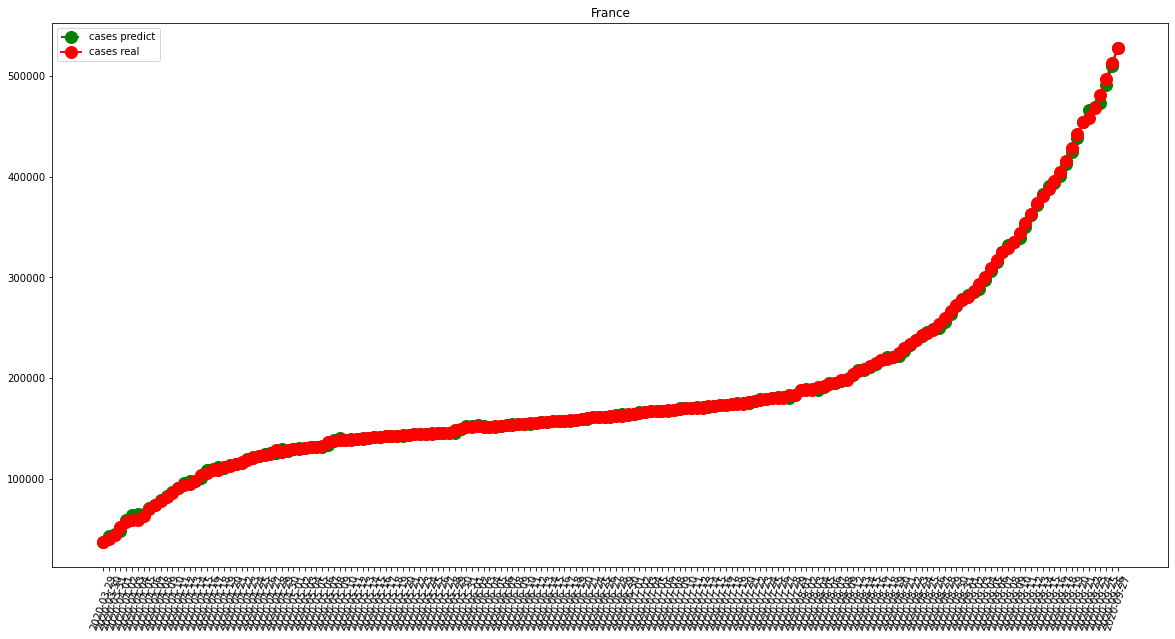

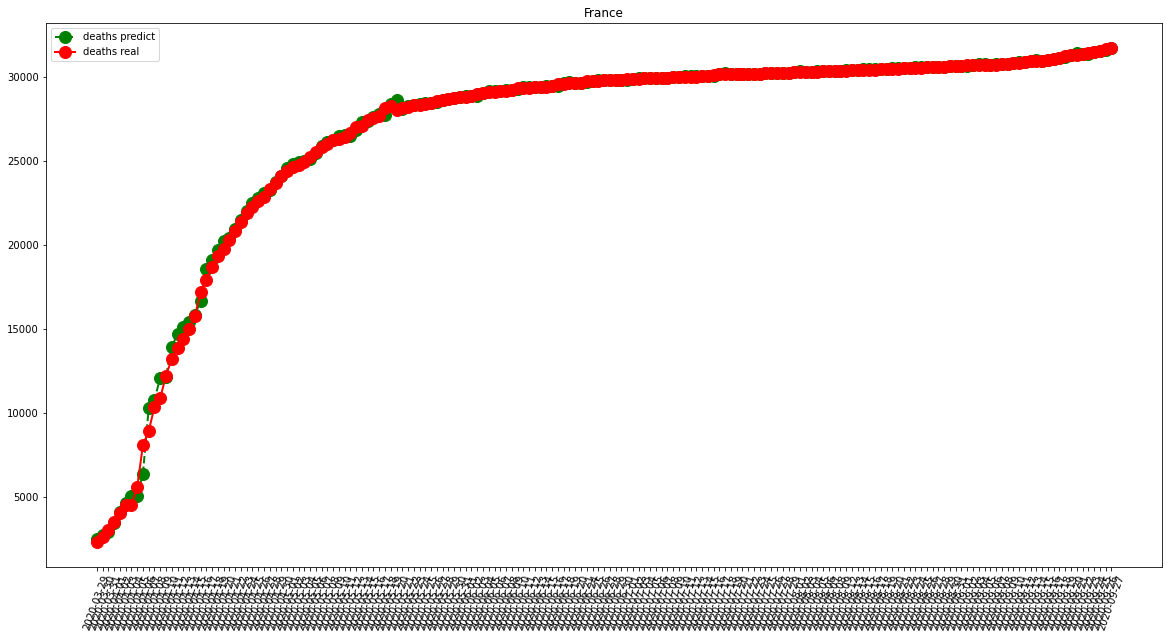

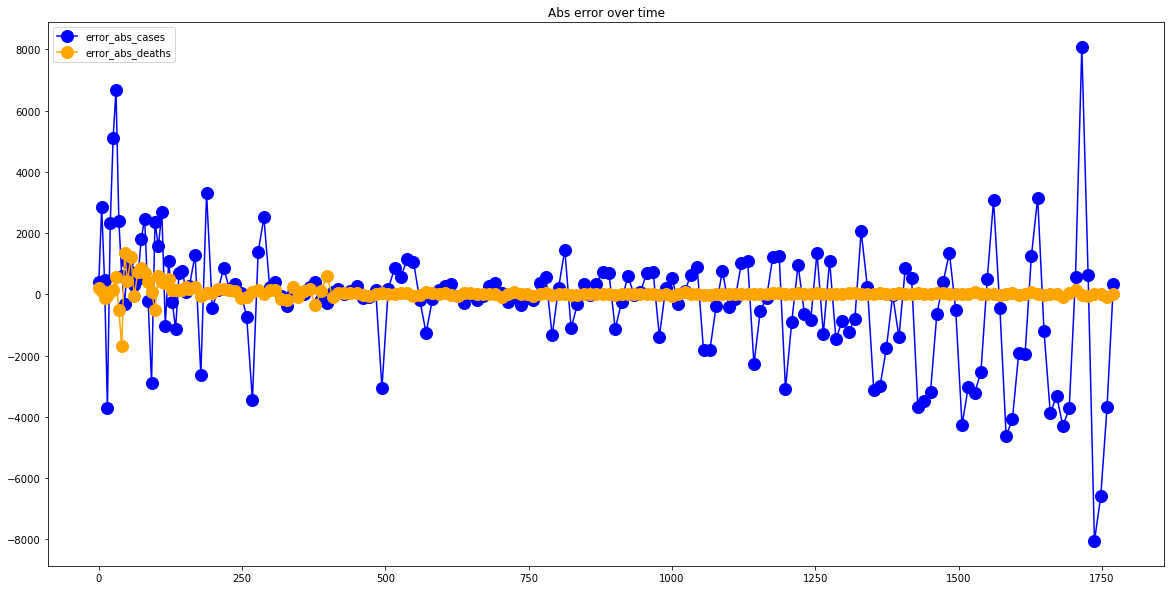

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  305.4719101123595
RMSE =  444.8854542640502
-- Italy performances for deaths --
MAE =  64.95505617977528
RMSE =  222.59097370071794


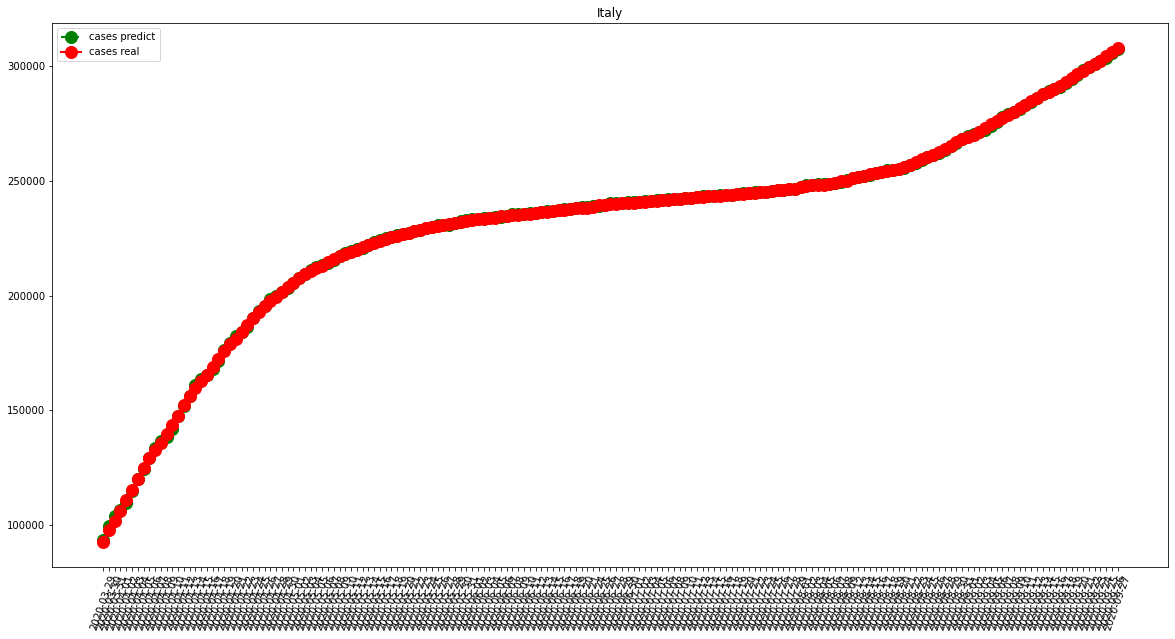

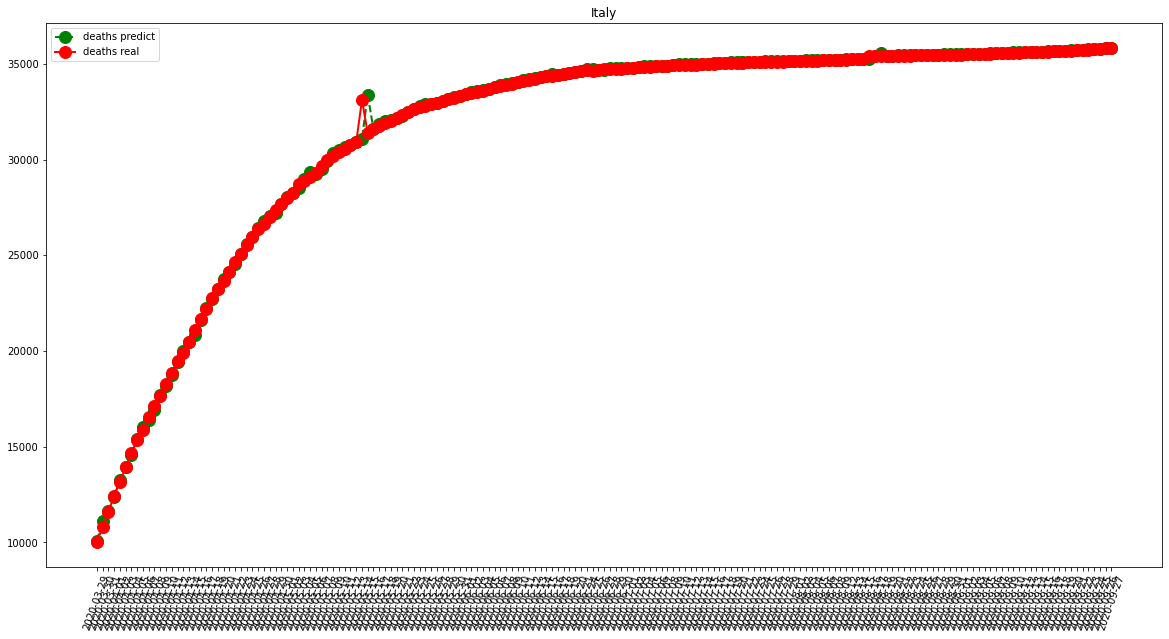

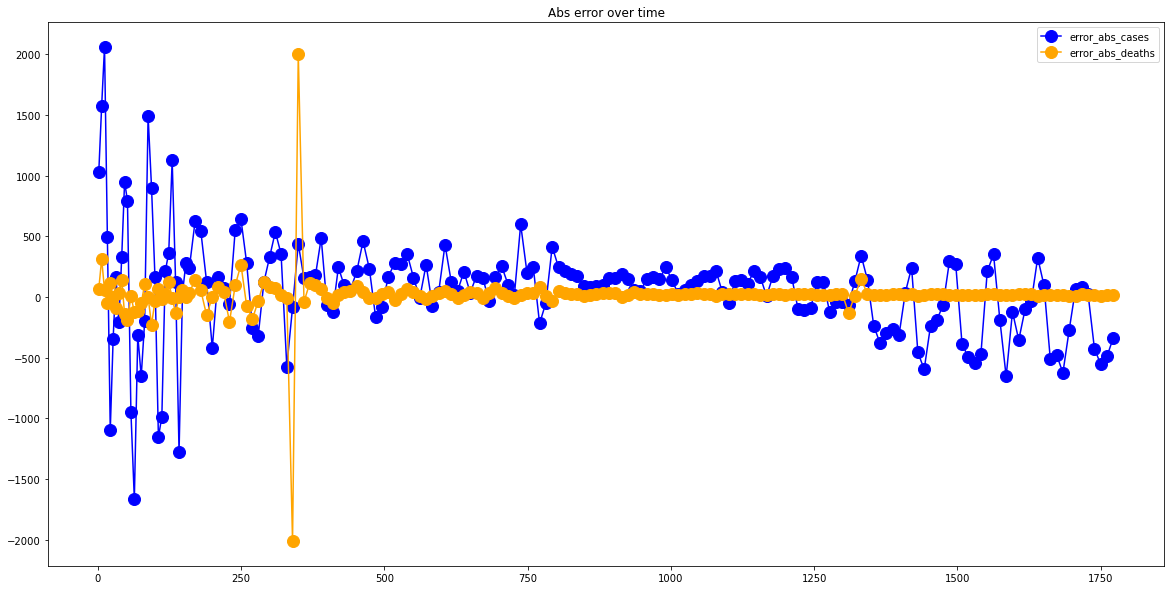

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2733.0337078651687
RMSE =  5309.097148111898
-- Spain performances for deaths --
MAE =  119.46067415730337
RMSE =  306.8312129794278


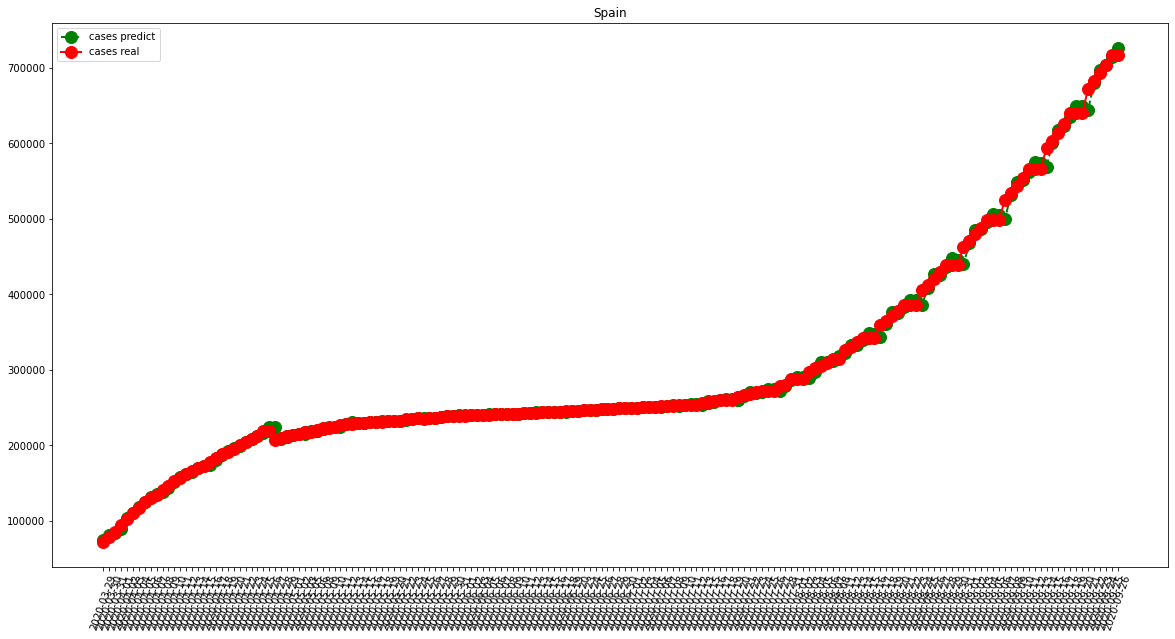

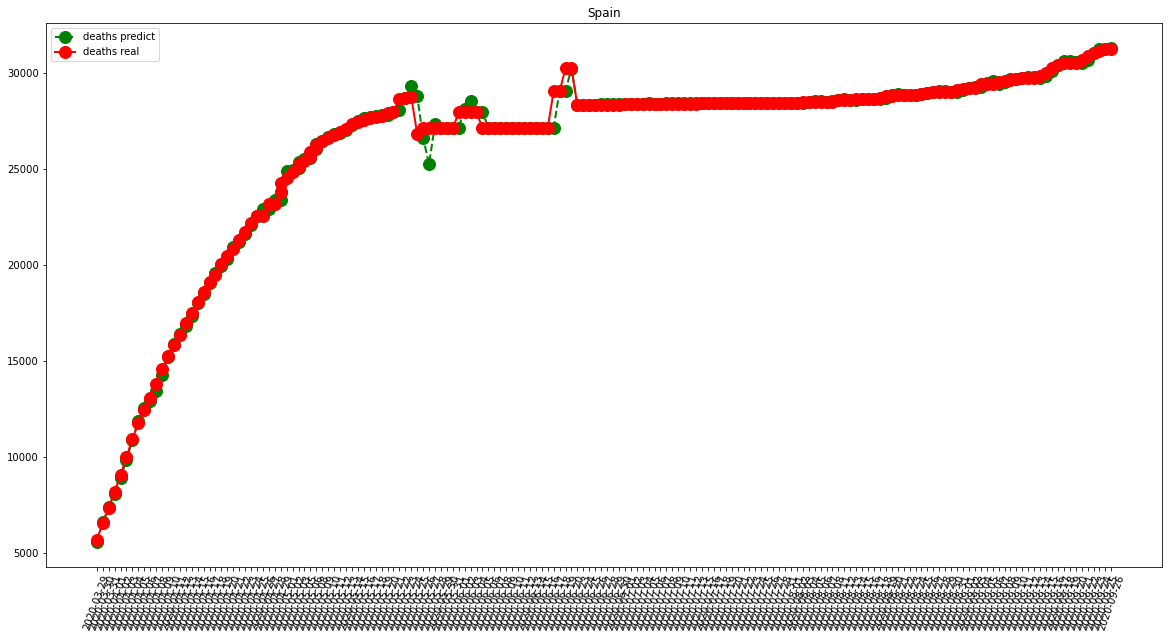

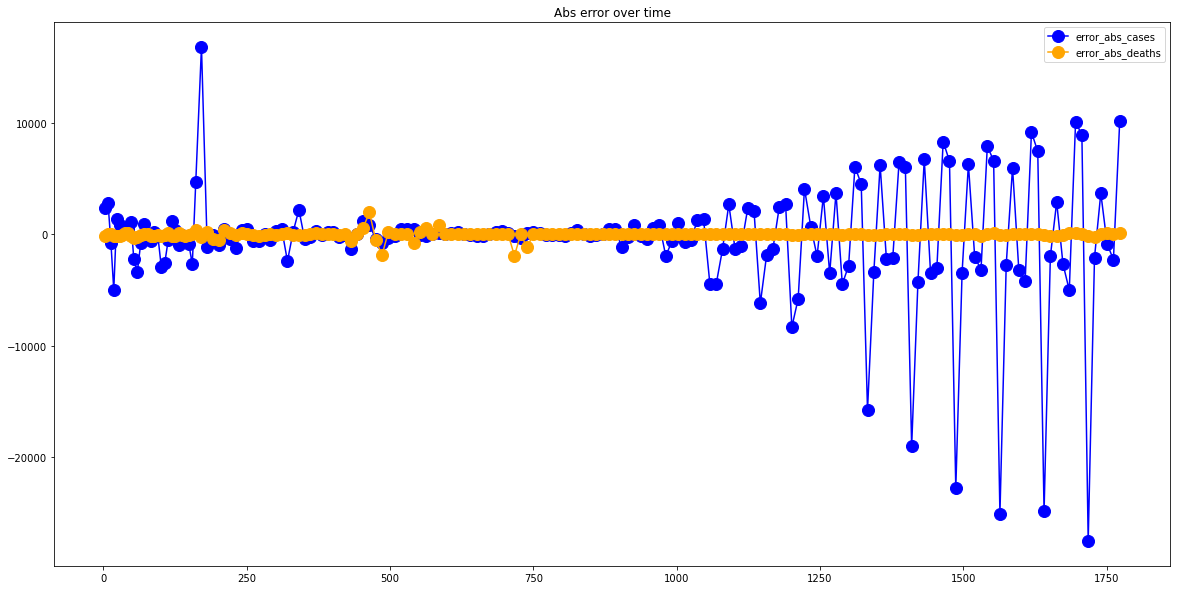

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15968.241573033707
RMSE =  23293.298181058115
-- United States performances for deaths --
MAE =  477.12359550561797
RMSE =  667.095599839965


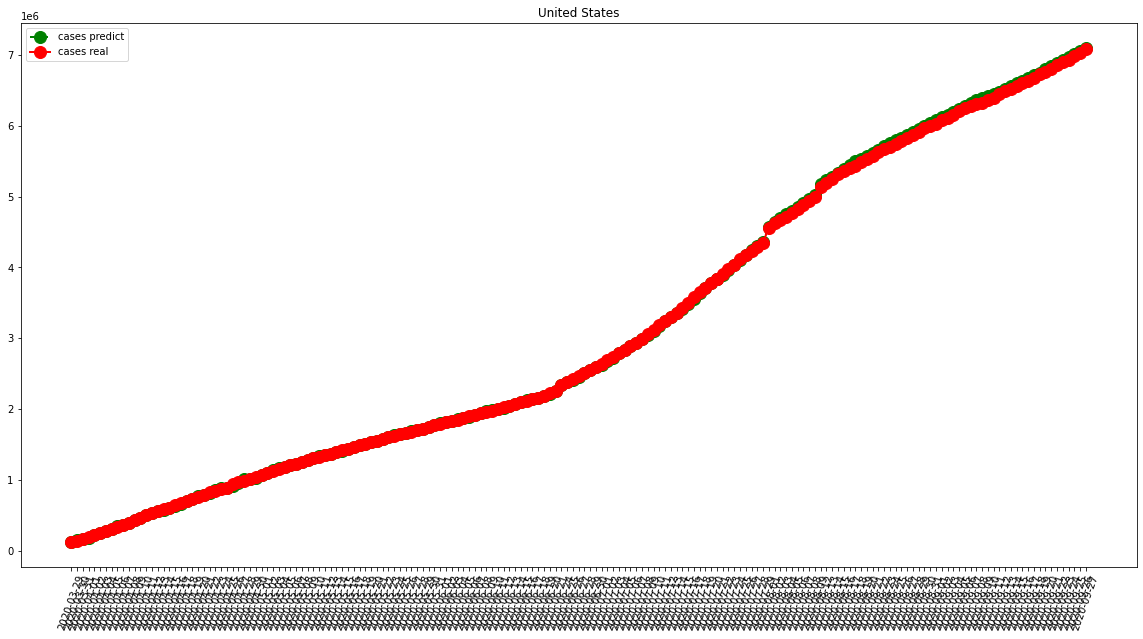

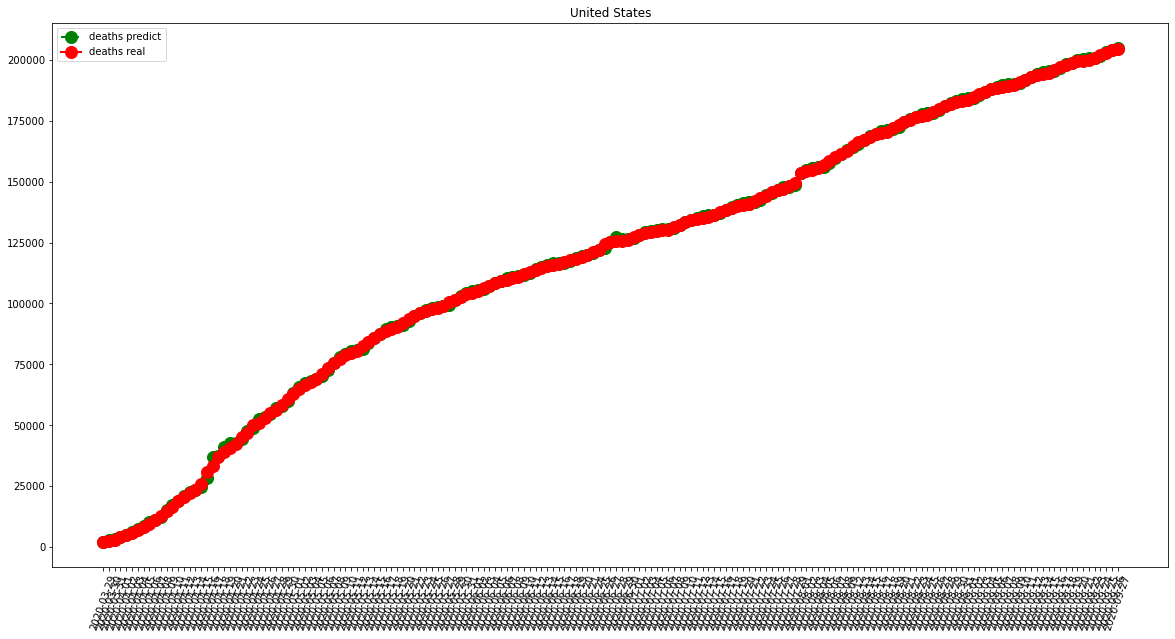

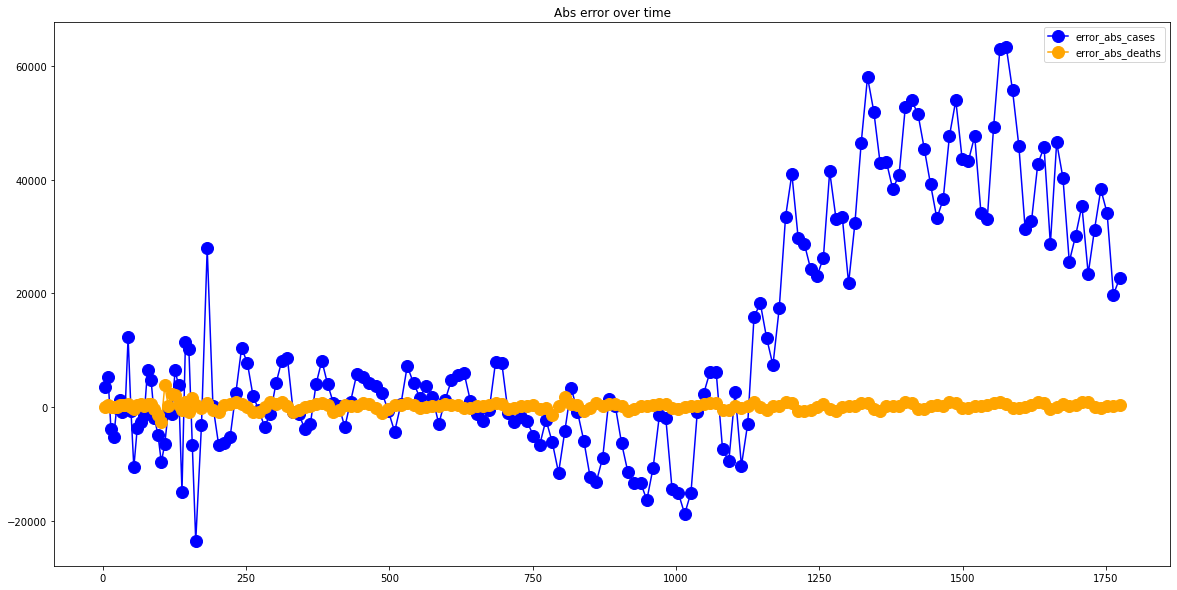

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  57.48876404494382
RMSE =  89.52530870584253
-- China performances for deaths --
MAE =  24.123595505617978
RMSE =  117.70941176463982


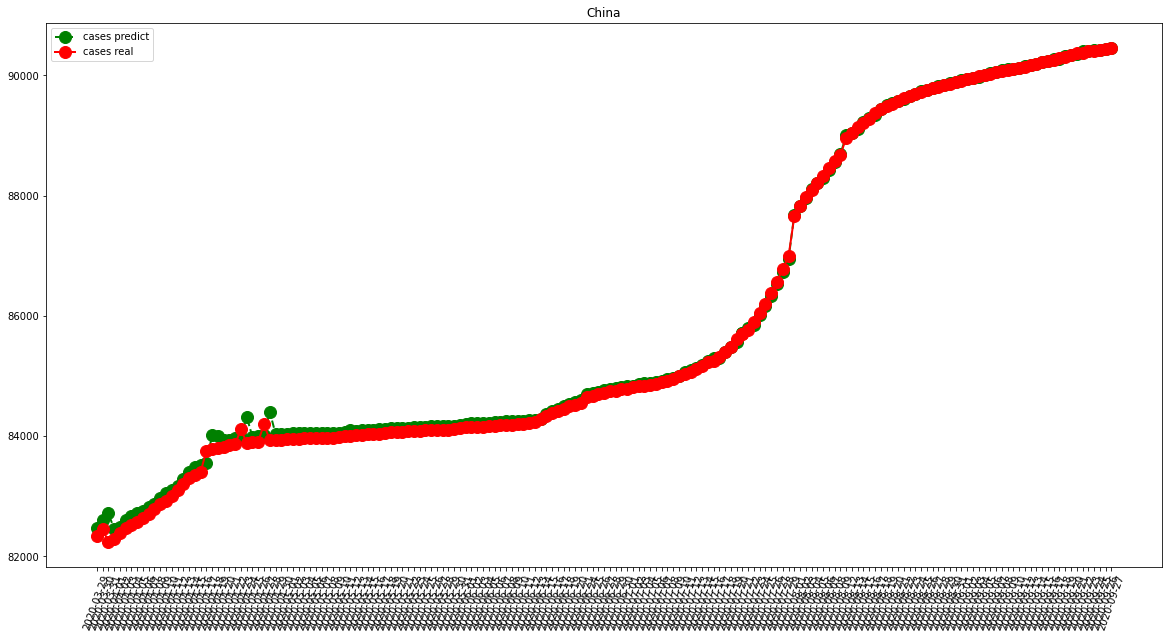

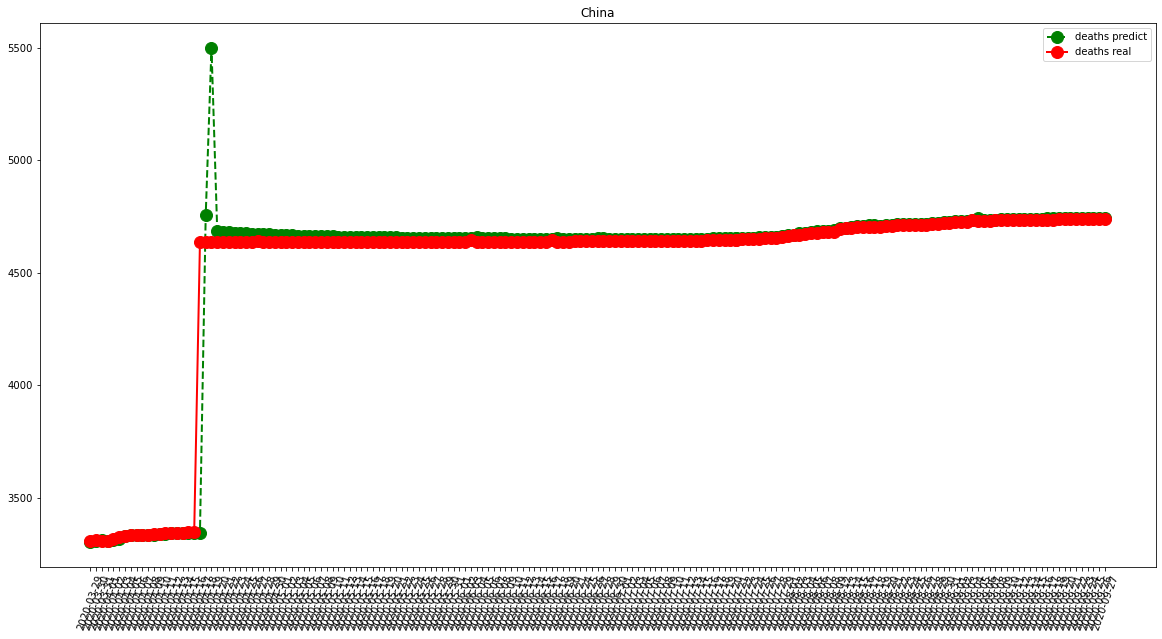

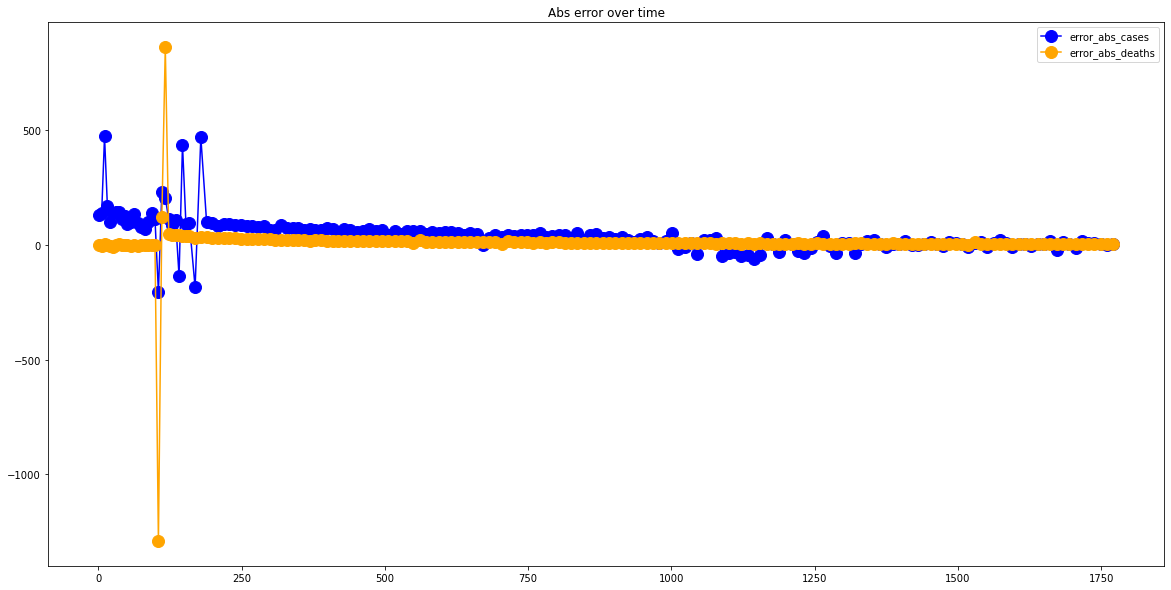

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1066.3066666666666
RMSE =  3462.9236741997843
-- United Kingdom performances for deaths --
MAE =  206.32
RMSE =  696.9160446806583


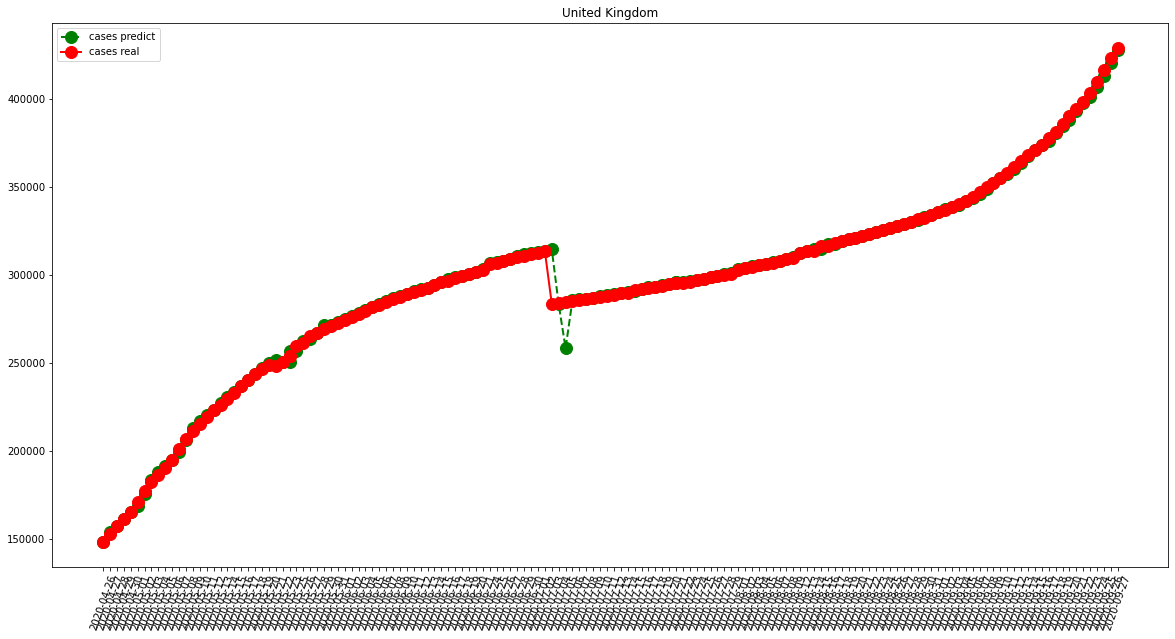

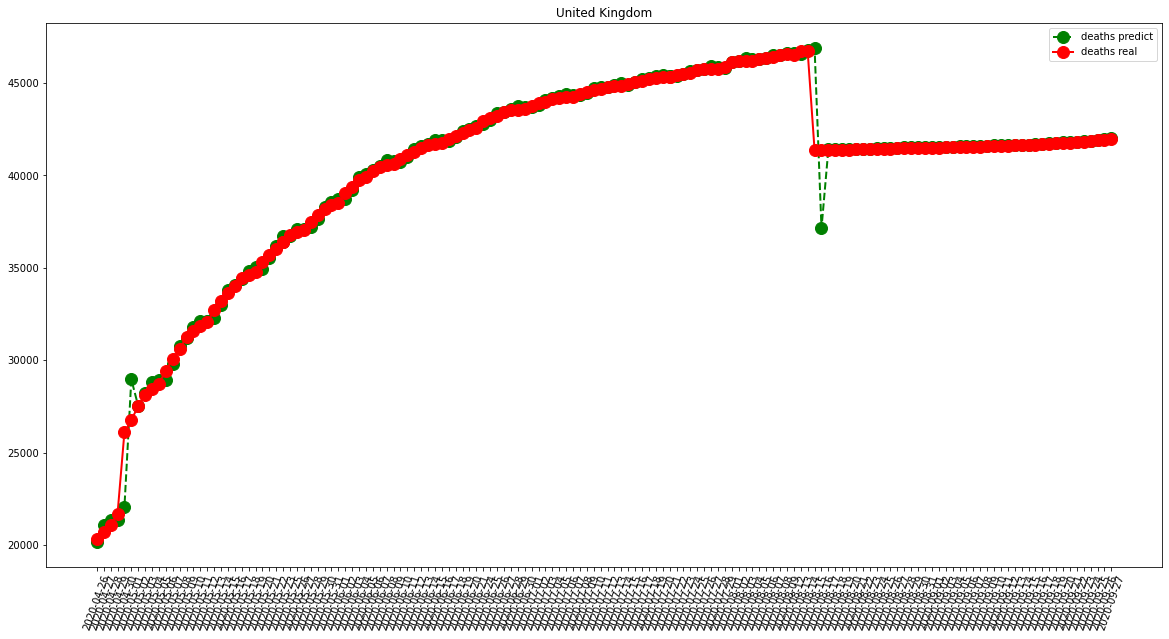

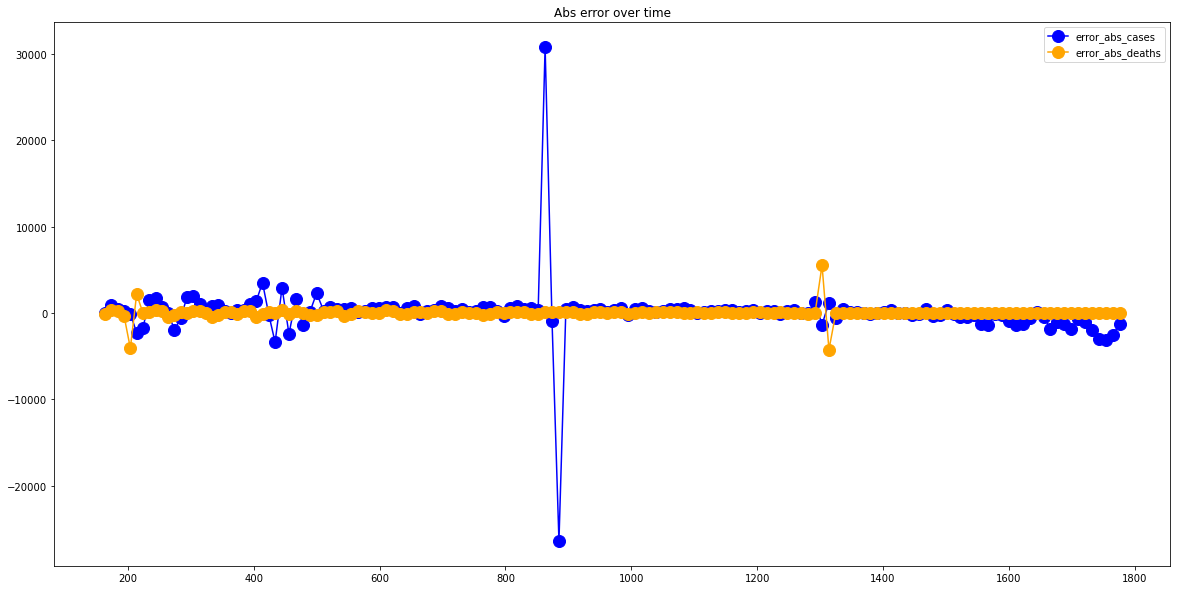

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  424.84
RMSE =  588.4838145607745
-- Germany performances for deaths --
MAE =  18.48
RMSE =  36.02203029628767


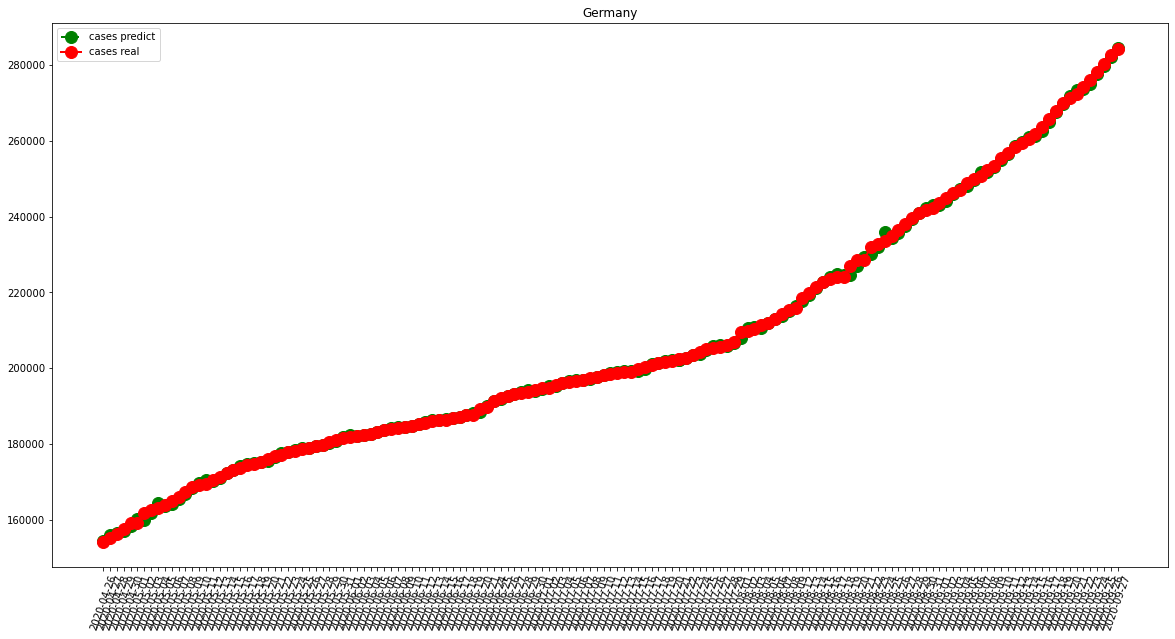

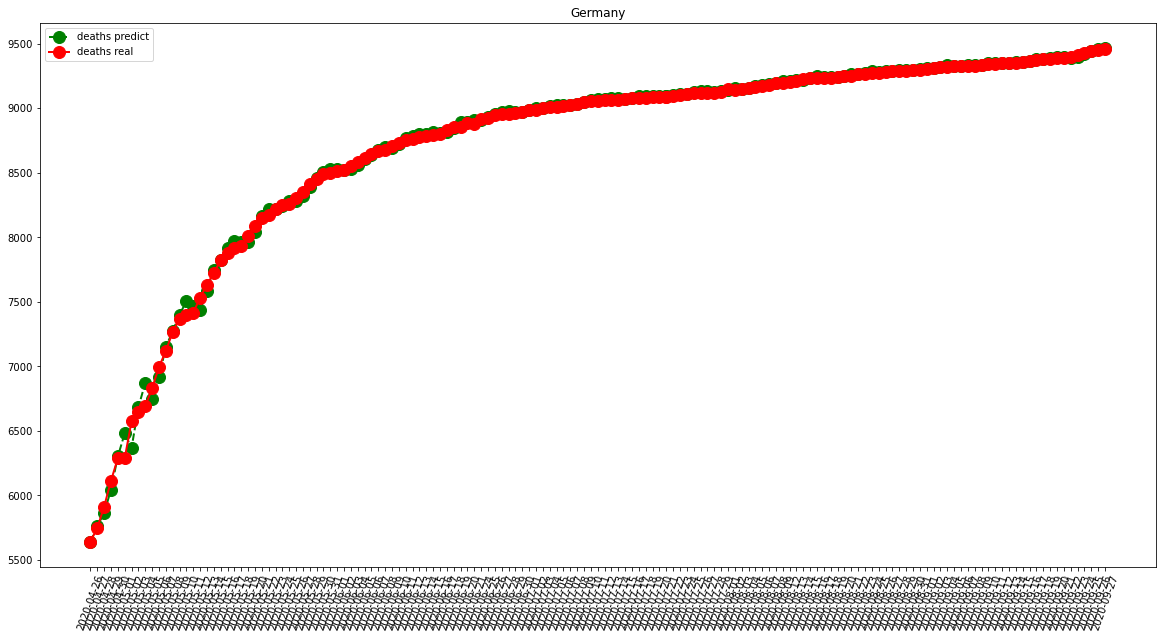

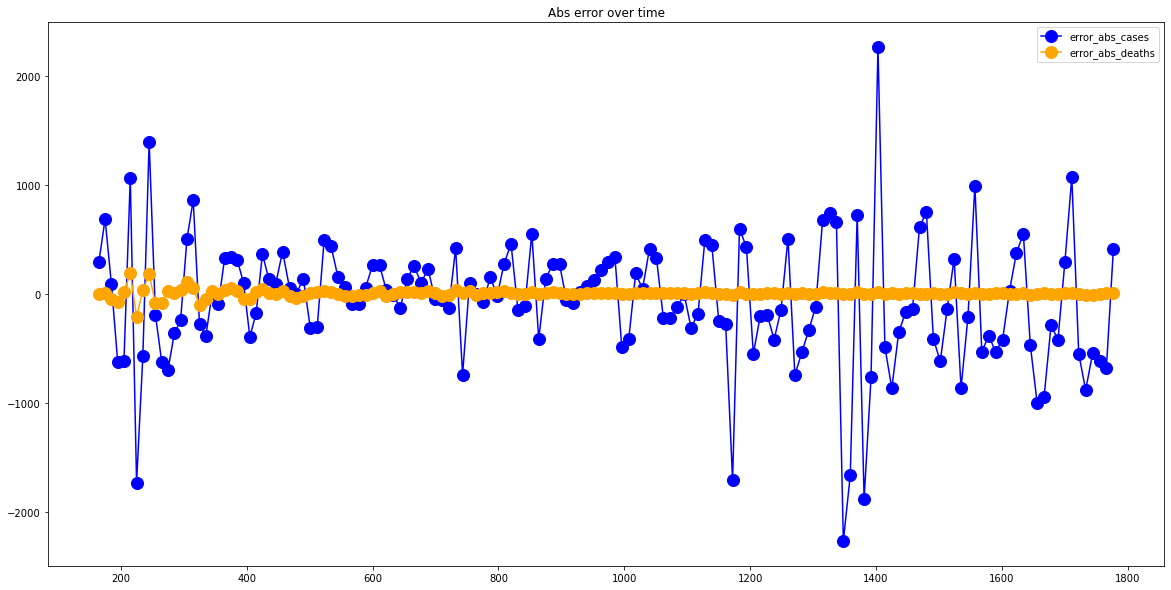

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  863.4333333333333
RMSE =  1212.6336874753233
-- Iran performances for deaths --
MAE =  50.88
RMSE =  83.84827567298765


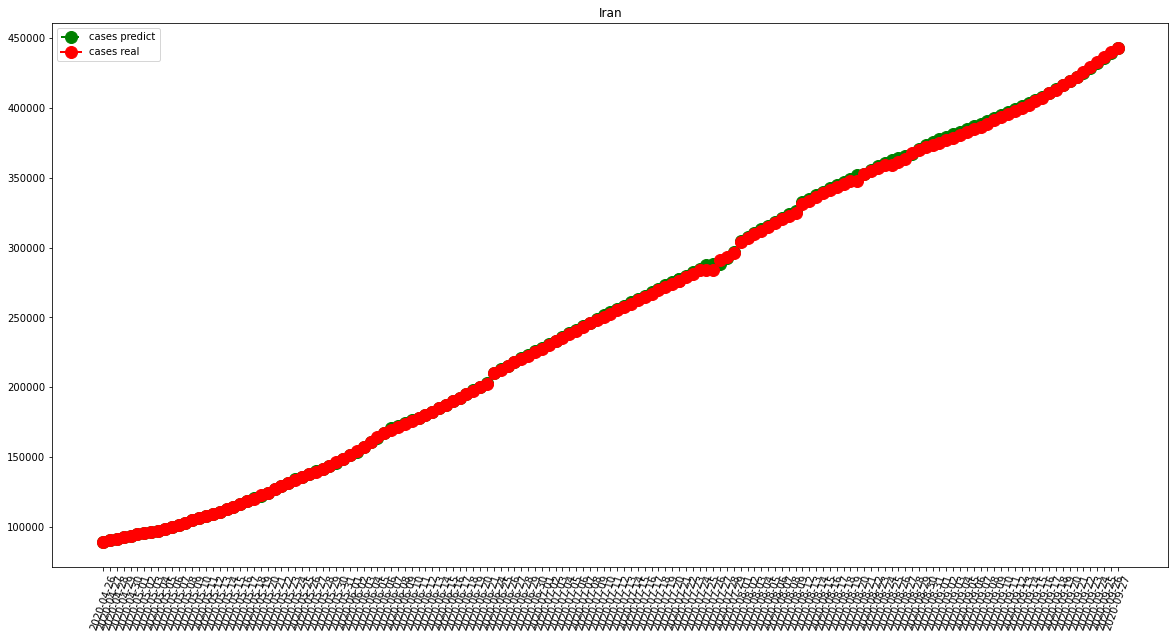

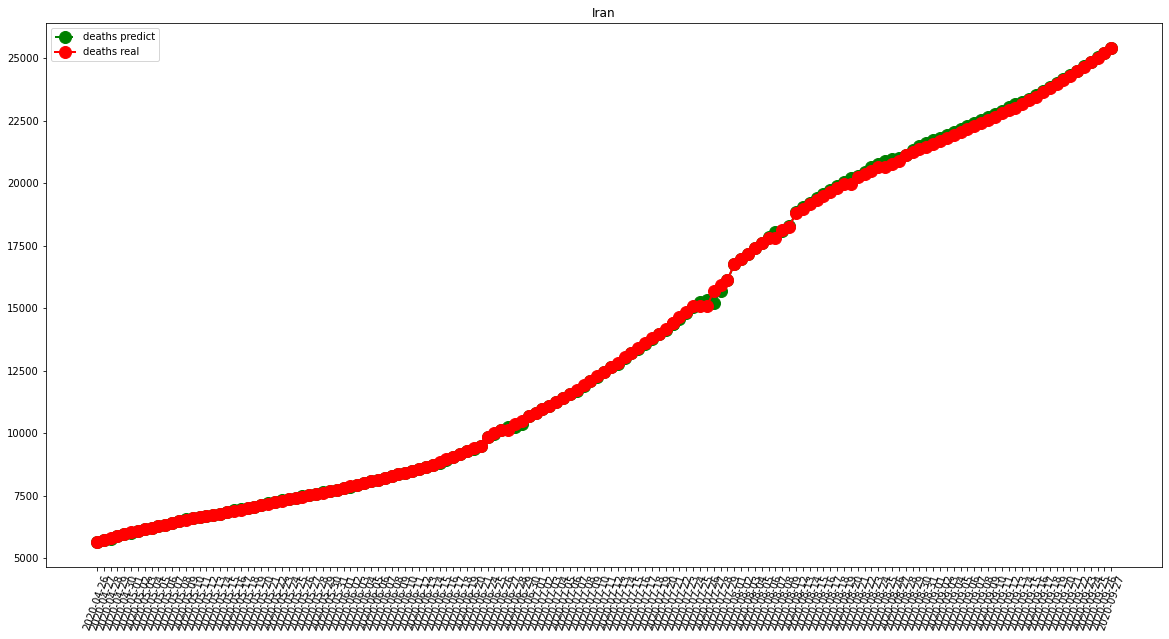

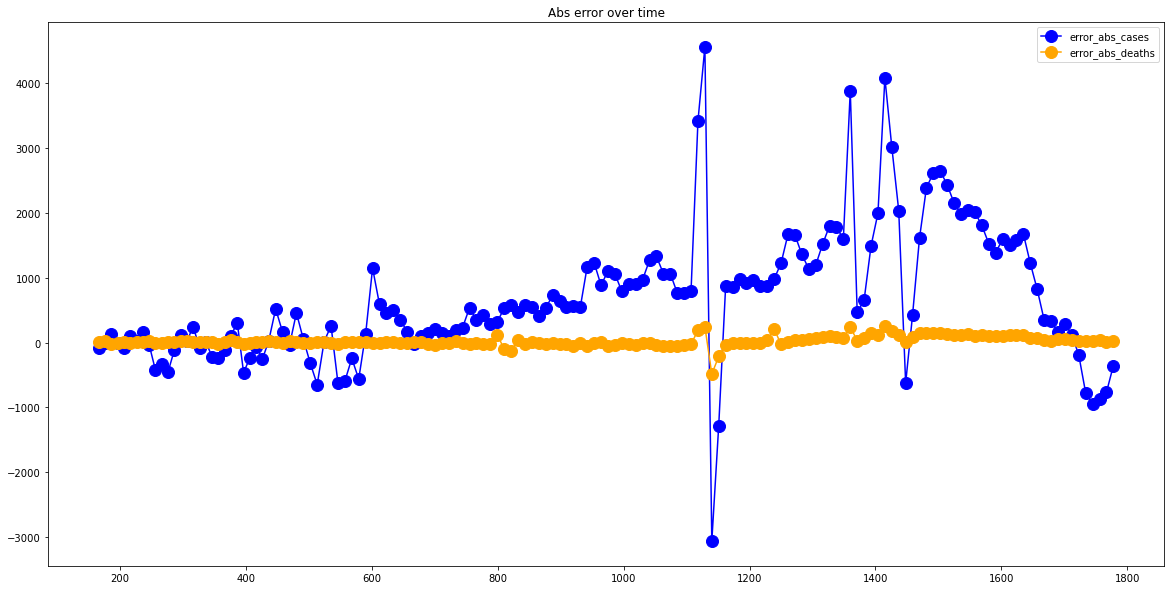

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  226.92666666666668
RMSE =  332.7981870944211
-- Turkey performances for deaths --
MAE =  15.88
RMSE =  83.15495575530461


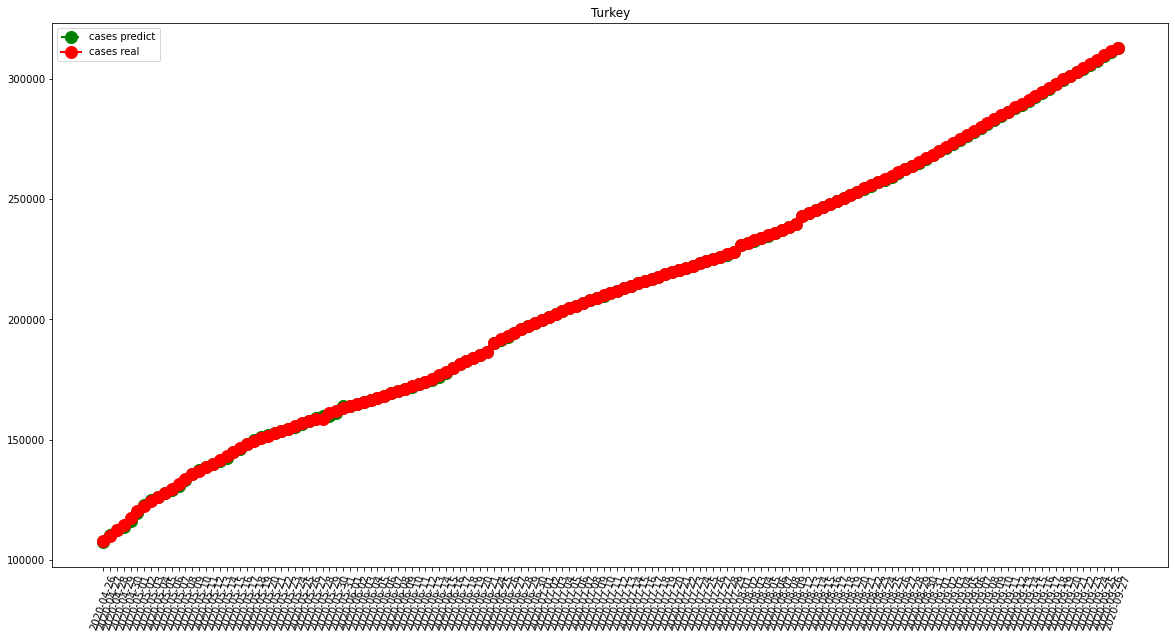

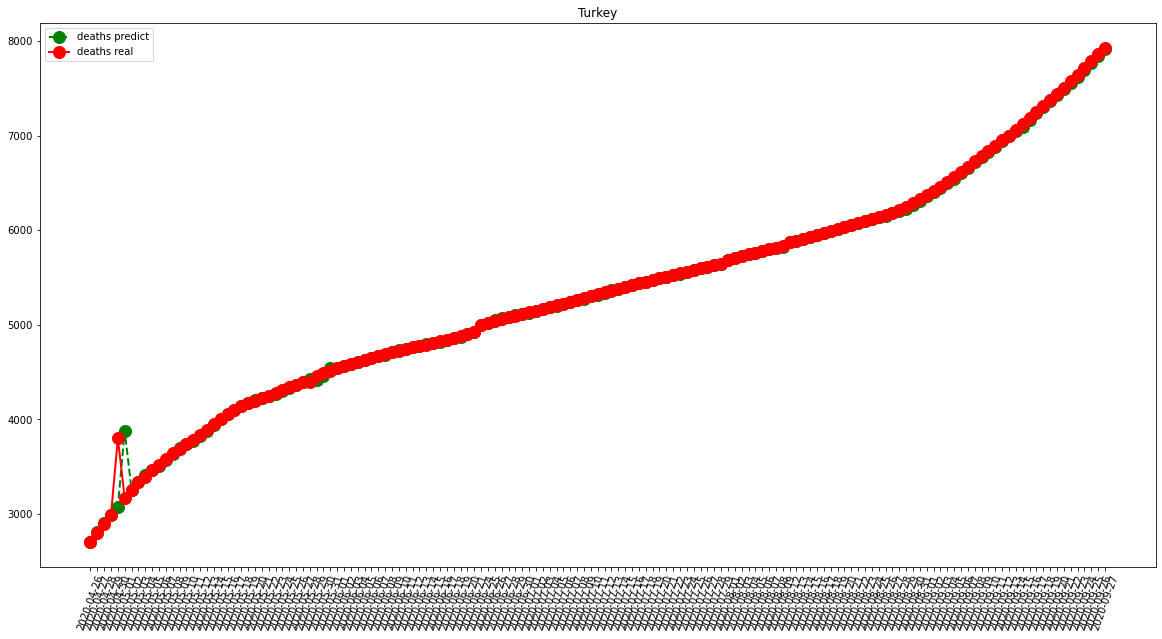

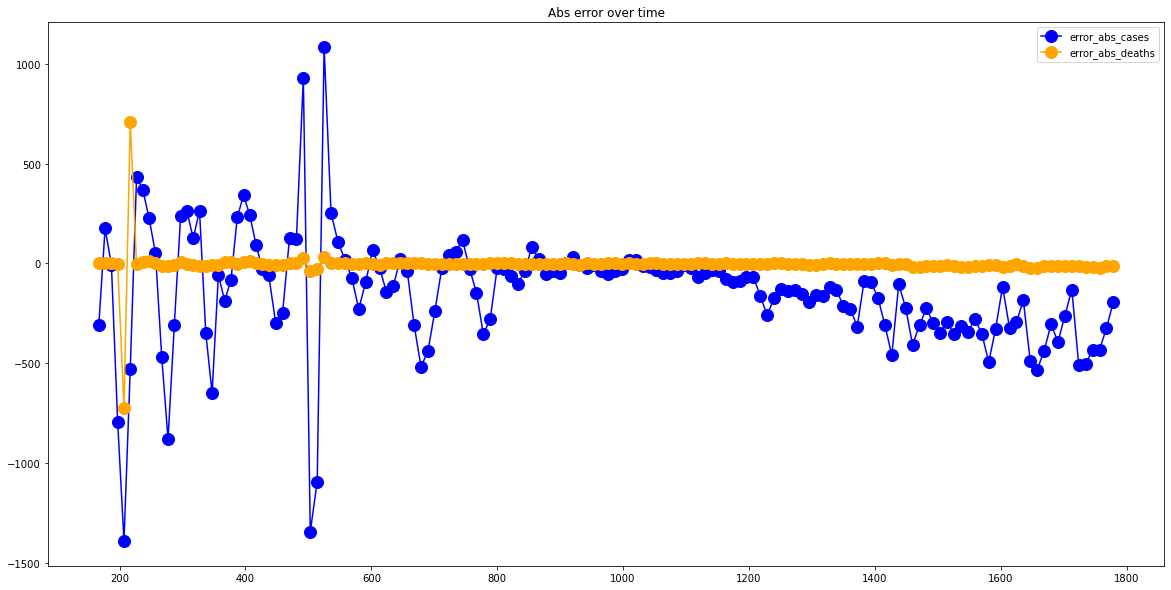

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16873.943089430893
RMSE =  21930.246320987528
-- Brazil performances for deaths --
MAE =  497.609756097561
RMSE =  600.3304239218422


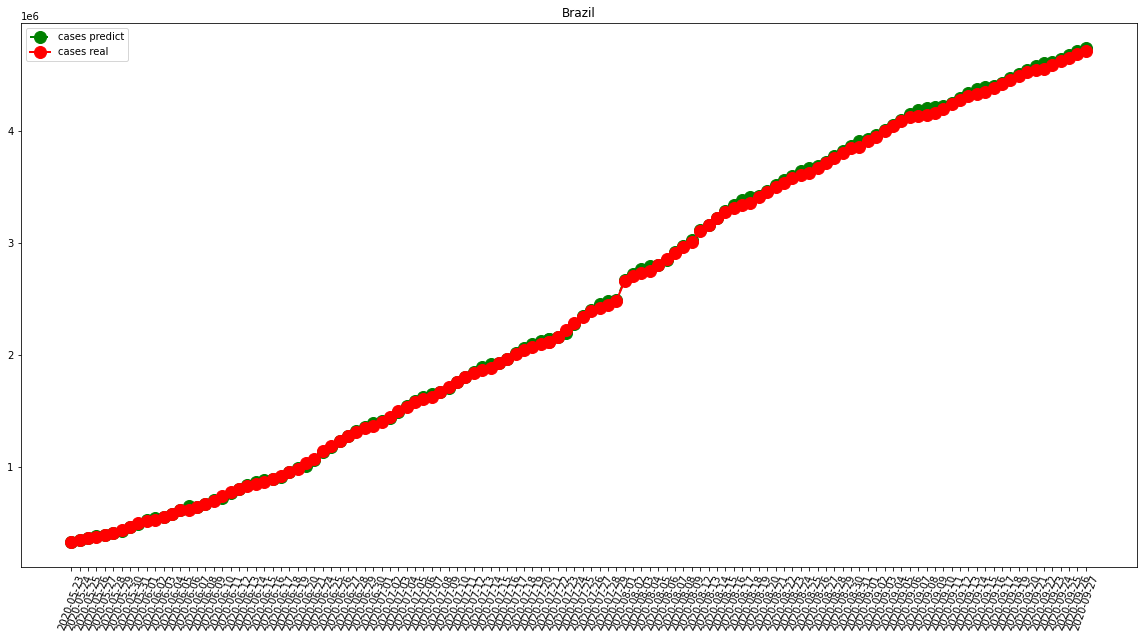

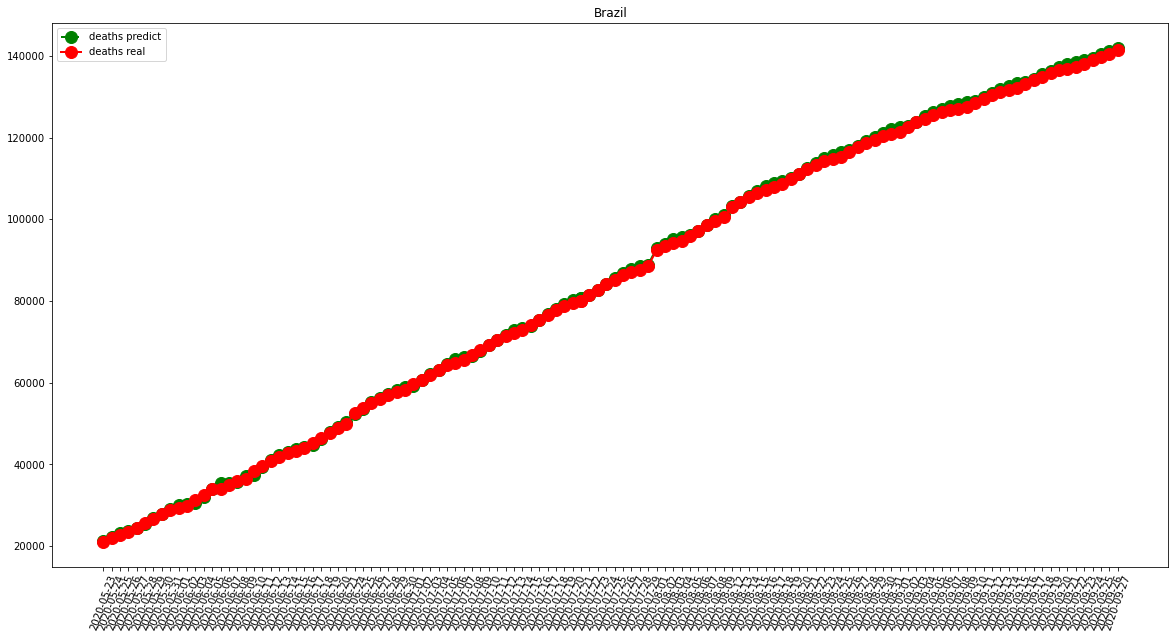

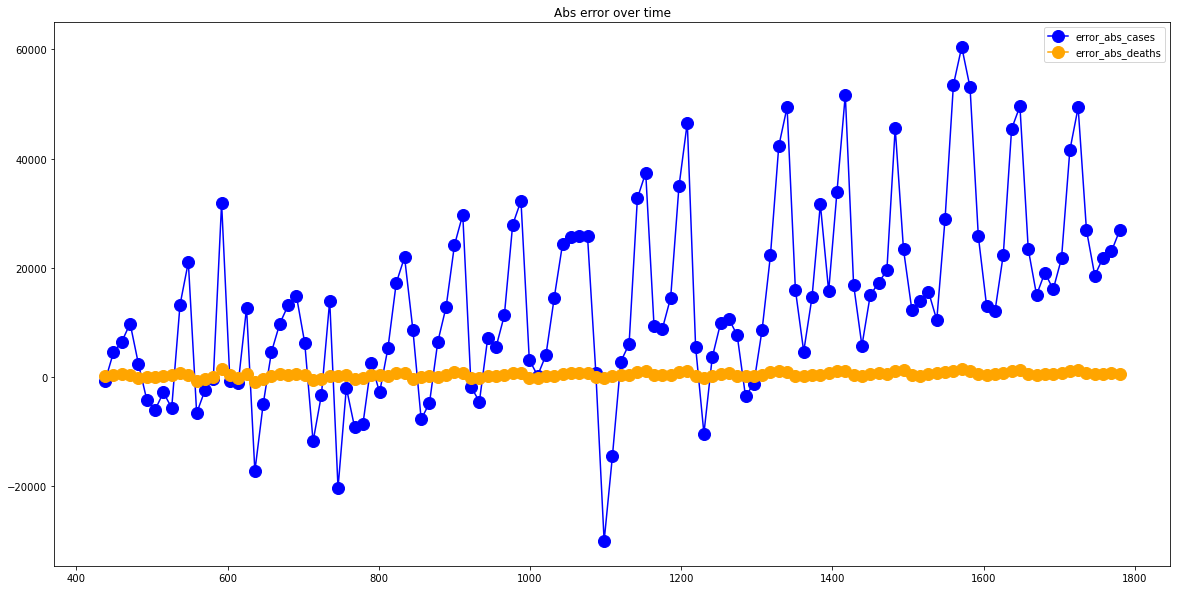

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)